In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('datasets/tourist_revisit_dataset.csv')

In [3]:
df.columns
df.head()

,Tourist_ID,Age,Gender,Region,Travel_Group_Size,Duration_of_Stay,Season_of_Visit,Type_of_Accommodation,Purpose_of_Visit,Number_of_Previous_Visits,Spending_per_Day,Distance_from_Home_Country,Satisfaction_Rating,Weather_Conditions,Major_Attractions_Visited,Participation_in_Local_Events,Interaction_with_Locals,Recommendation_Likelihood,Social_Media_Shares,Revisit_Intention
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,53,Female,South American,6,0.678571,Fall,Resort,Family,9,0.962334,535,0.889399,Sunny,3,No,1.0,0.186742,0.333333,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,66,Male,Europe,1,0.285714,Winter,HomeStay,Education,3,0.964611,4400,0.518880,Rainy,4,No,1.0,0.510478,0.555556,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,43,Female,North American,9,0.357143,Fall,Resort,Education,8,0.289034,3244,0.564588,Snowy,2,Yes,0.5,0.529381,0.000000,0
3,972a8469-1641-4f82-8b9d-2434e465e150,29,Other,Asian-Others,2,0.821429,Winter,Resort,Education,4,0.479371,3687,0.669409,Cloudy,1,Yes,1.0,0.876767,0.111111,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,57,Other,Oceania,5,0.750000,Winter,HomeStay,Business,1,0.972974,176,0.961579,Rainy,3,No,0.5,0.462717,0.777778,0


## Define Features and Target Variable

In [4]:
y = df['Revisit_Intention']
df = df.drop(columns=['Tourist_ID', 'Revisit_Intention'])


In [5]:
df.isnull().sum()

Age                              0
Gender                           0
Region                           0
Travel_Group_Size                0
Duration_of_Stay                 0
Season_of_Visit                  0
Type_of_Accommodation            0
Purpose_of_Visit                 0
Number_of_Previous_Visits        0
Spending_per_Day                 0
Distance_from_Home_Country       0
Satisfaction_Rating              0
Weather_Conditions               0
Major_Attractions_Visited        0
Participation_in_Local_Events    0
Interaction_with_Locals          0
Recommendation_Likelihood        0
Social_Media_Shares              0
dtype: int64

## Categorical and Numerical Columns

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [7]:
categorical_data = df.drop (columns=numerical_columns)

In [8]:
categorical_data

,Gender,Region,Season_of_Visit,Type_of_Accommodation,Purpose_of_Visit,Weather_Conditions,Participation_in_Local_Events
0,Female,South American,Fall,Resort,Family,Sunny,No
1,Male,Europe,Winter,HomeStay,Education,Rainy,No
2,Female,North American,Fall,Resort,Education,Snowy,Yes
3,Other,Asian-Others,Winter,Resort,Education,Cloudy,Yes
4,Other,Oceania,Winter,HomeStay,Business,Rainy,No
...,...,...,...,...,...,...,...
995,Other,Oceania,Winter,Hotel,Education,Snowy,No
996,Female,North American,Summer,HomeStay,Tourism,Snowy,Yes
997,Male,Asian-Others,Monsoon,Resort,Tourism,Snowy,No
998,Male,Asian-Others,Monsoon,Resort,Tourism,Cloudy,No


## One Hot Encoding on Categorical Data

In [9]:
encoded_data = pd.get_dummies(categorical_data, columns=['Gender', 'Region', 'Season_of_Visit', 'Type_of_Accommodation',
       'Purpose_of_Visit', 'Weather_Conditions',
       'Participation_in_Local_Events'])

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Standardization of Numerical columns

In [11]:
numerical_pipeline= Pipeline([
    ('scaler', StandardScaler())
])

#Transform numerical columns

numerical_data = numerical_pipeline.fit_transform(df[numerical_columns])

#Convert transformed numerical data back to DataFrame

numerical_data_df = pd.DataFrame(numerical_data, columns= numerical_columns)


## Final Features Dataframe

In [12]:
final_data = pd.concat([encoded_data,numerical_data_df],axis=1)
final_data.head(10)

,Gender_Female,Gender_Male,Gender_Other,Region_Asian-Others,Region_Asian-SAARC,Region_Europe,Region_North American,Region_Oceania,Region_South American,Season_of_Visit_Fall,...,Travel_Group_Size,Duration_of_Stay,Number_of_Previous_Visits,Spending_per_Day,Distance_from_Home_Country,Satisfaction_Rating,Major_Attractions_Visited,Interaction_with_Locals,Recommendation_Likelihood,Social_Media_Shares
0,True,False,False,False,False,False,False,False,True,True,...,0.379022,0.546931,1.551491,1.614671,-1.487992,1.296596,0.679386,1.235935,-1.054407,-0.505750
1,False,True,False,False,False,True,False,False,False,False,...,-1.560701,-0.751631,-0.525935,1.622626,1.228257,0.031296,1.381956,1.235935,0.044339,0.198637
2,True,False,False,False,False,False,True,False,False,True,...,1.542856,-0.515529,1.205253,-0.737570,0.415842,0.187388,-0.023185,-0.011224,0.108494,-1.562330
3,False,False,True,True,False,False,False,False,False,False,...,-1.172757,1.019135,-0.179697,-0.072609,0.727174,0.545344,-0.725755,1.235935,1.287507,-1.210136
4,False,False,True,False,False,False,False,True,False,False,...,-0.008923,0.783033,-1.218410,1.651841,-1.740290,1.543087,0.679386,-0.011224,-0.117760,0.903024
5,False,True,False,False,False,True,False,False,False,True,...,1.542856,-1.696040,1.551491,-1.732510,-1.220935,0.316126,-0.023185,-0.011224,-0.739541,-0.505750
6,False,True,False,False,False,False,False,False,True,False,...,-0.396867,0.310828,0.859016,-0.306677,-1.254669,0.168380,-0.023185,-1.258384,-0.904202,1.607411
7,True,False,False,False,False,False,False,True,False,True,...,-0.784812,-1.105784,0.512778,-1.398300,0.796046,-1.695569,-1.428326,-1.258384,1.280878,0.550830
8,True,False,False,False,False,False,False,False,True,True,...,0.766967,1.373288,0.859016,0.030647,-1.719910,-1.468397,0.679386,-1.258384,-1.107856,-0.505750
9,False,True,False,False,False,False,False,True,False,True,...,0.379022,-1.577989,-0.872173,-1.663277,0.958389,0.228910,1.381956,-1.258384,-0.242168,1.255217


## Random Forest Classifier

In [13]:
import joblib
import os
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [14]:
X= final_data
X.columns

Index(['Gender_Female', 'Gender_Male', 'Gender_Other', 'Region_Asian-Others',
       'Region_Asian-SAARC', 'Region_Europe', 'Region_North American',
       'Region_Oceania', 'Region_South American', 'Season_of_Visit_Fall',
       'Season_of_Visit_Monsoon', 'Season_of_Visit_Spring',
       'Season_of_Visit_Summer', 'Season_of_Visit_Winter',
       'Type_of_Accommodation_HomeStay', 'Type_of_Accommodation_Hostel',
       'Type_of_Accommodation_Hotel', 'Type_of_Accommodation_Resort',
       'Purpose_of_Visit_Business', 'Purpose_of_Visit_Education',
       'Purpose_of_Visit_Family', 'Purpose_of_Visit_Tourism',
       'Weather_Conditions_Cloudy', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Participation_in_Local_Events_No', 'Participation_in_Local_Events_Yes',
       'Age', 'Travel_Group_Size', 'Duration_of_Stay',
       'Number_of_Previous_Visits', 'Spending_per_Day',
       'Distance_from_Home_Country', 'Satisfaction_Rating',
       'M

## Handle Class Imbalance with SMOTE

In [15]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
y.value_counts()

Revisit_Intention
0    790
1    210
Name: count, dtype: int64

In [16]:
# X= final_data
X_train, X_test, y_train, y_test= train_test_split(X_res,y_res,test_size=0.2, random_state=42)

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict on training and test sets

In [17]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]


## Calculate Accuracy Scores and Classification Report

In [18]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Classification report
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.00
Testing Accuracy: 0.99
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00       643

    accuracy                           1.00      1264
   macro avg       1.00      1.00      1.00      1264
weighted avg       1.00      1.00      1.00      1264


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       169
           1       0.97      1.00      0.99       147

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316



## ROC Curve and AOC

In [19]:
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 1.00


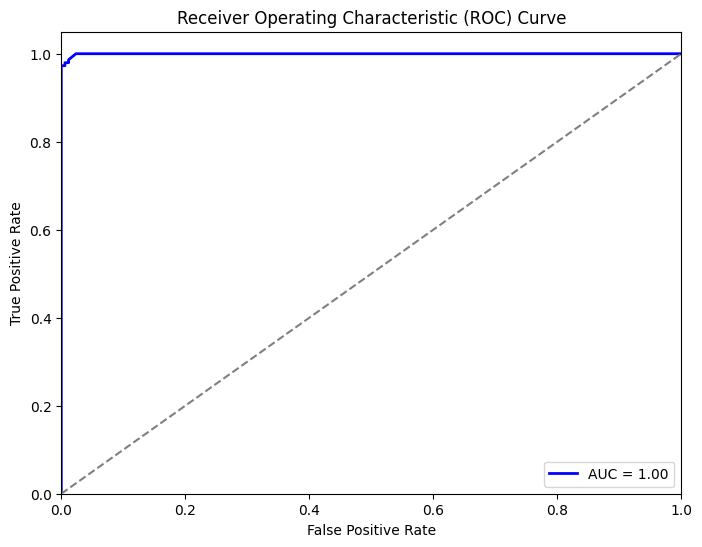

In [20]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix

Confusion Matrix:
[[165   4]
 [  0 147]]


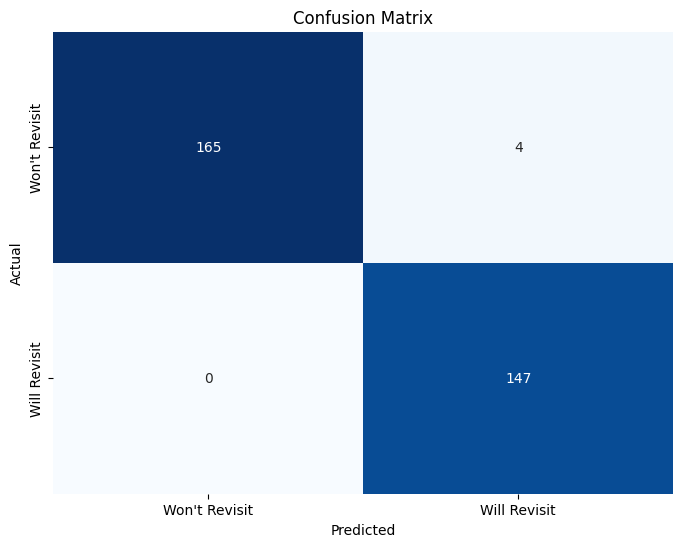

In [21]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Won't Revisit", 'Will Revisit'], yticklabels=["Won't Revisit", 'Will Revisit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Save the model

In [22]:
import joblib
joblib.dump(model, 'model/random_forest_model.pkl')

['model/random_forest_model.pkl']